<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%E3%80%90%E8%A7%A3%E7%AD%94%E4%BE%8B%E3%80%91%E3%83%AC%E3%83%9B%E3%82%9A%E3%83%BC%E3%83%88%E8%AA%B2%E9%A1%8C_%E3%83%95%E3%82%9A%E3%83%AD%E3%82%AF%E3%82%99%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%AF%E3%82%99%E2%85%A2_1718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

各課題について、コメントを参考にしてプログラムを書いてください。実行ボタンを押して、プログラムが正しく実行されることを確認してください。提出の際は、コメントを削除せずに残してください。全ての課題を解けなかった場合でも、〆切までに提出すれば途中点が付与されます。**レポート課題は配点が大きいので、必ず期限内に提出してください。未提出の場合、<font color='red'>単位を落とす可能性が非常に高くなります</font>。**

# 課題1-1

Needleman-WunshアルゴリズムをPythonで書いてみましょう。講義資料で例として使用した配列`PAWHEAE`と`HEAGAWGHEE`のグローバルアライメントを計算して、講義資料と同じ結果になることを確認してください。その後、実際のタンパク質の例として、ヒトのミオグロビンとニワトリのヘモグロビンβ鎖のグローバルアライメントを計算してください。以下の手順に沿って進めてください。

手順1

本課題では置換スコア行列としてBLOSUM50を使用します。ギャップスコアはd=8とします。以下のセルを読んで、置換スコアの関数を書いてください。

In [ ]:
# BLOSUM50置換行列
BLOSUM50 = [
    [ 5, -2, -1, -2, -1, -1, -1,  0, -2, -1, -2, -1, -1, -3, -1,  1,  0, -3, -2,  0],
    [-2,  7, -1, -2, -4,  1,  0, -3,  0, -4, -3,  3, -2, -3, -3, -1, -1, -3, -1, -3],
    [-1, -1,  7,  2, -2,  0,  0,  0,  1, -3, -4,  0, -2, -4, -2,  1,  0, -4, -2, -3],
    [-2, -2,  2,  8, -4,  0,  2, -1, -1, -4, -4, -1, -4, -5, -1,  0, -1, -5, -3, -4],
    [-1, -4, -2, -4, 13, -3, -3, -3, -3, -2, -2, -3, -2, -2, -4, -1, -1, -5, -3, -1],
    [-1,  1,  0,  0, -3,  7,  2, -2,  1, -3, -2,  2,  0, -4, -1,  0, -1, -1, -1, -3],
    [-1,  0,  0,  2, -3,  2,  6, -3,  0, -4, -3,  1, -2, -3, -1, -1, -1, -3, -2, -3],
    [ 0, -3,  0, -1, -3, -2, -3,  8, -2, -4, -4, -2, -3, -4, -2,  0, -2, -3, -3, -4],
    [-2,  0,  1, -1, -3,  1,  0, -2, 10, -4, -3,  0, -1, -1, -2, -1, -2, -3,  2, -4],
    [-1, -4, -3, -4, -2, -3, -4, -4, -4,  5,  2, -3,  2,  0, -3, -3, -1, -3, -1,  4],
    [-2, -3, -4, -4, -2, -2, -3, -4, -3,  2,  5, -3,  3,  1, -4, -3, -1, -2, -1,  1],
    [-1,  3,  0, -1, -3,  2,  1, -2,  0, -3, -3,  6, -2, -4, -1,  0, -1, -3, -2, -3],
    [-1, -2, -2, -4, -2,  0, -2, -3, -1,  2,  3, -2,  7,  0, -3, -2, -1, -1,  0,  1],
    [-3, -3, -4, -5, -2, -4, -3, -4, -1,  0,  1, -4,  0,  8, -4, -3, -2,  1,  4, -1],
    [-1, -3, -2, -1, -4, -1, -1, -2, -2, -3, -4, -1, -3, -4, 10, -1, -1, -4, -3, -3],
    [ 1, -1,  1,  0, -1,  0, -1,  0, -1, -3, -3,  0, -2, -3, -1,  5,  2, -4, -2, -2],
    [ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  2,  5, -3, -2,  0],
    [-3, -3, -4, -5, -5, -1, -3, -3, -3, -3, -2, -3, -1,  1, -4, -4, -3, 15,  2, -3],
    [-2, -1, -2, -3, -3, -1, -2, -3,  2, -1, -1, -2,  0,  4, -3, -2, -2,  2,  8, -1],
    [ 0, -3, -3, -4, -1, -3, -3, -4, -4,  4,  1, -3,  1, -1, -3, -2,  0, -3, -1,  5]
]
# アミノ酸とBLOSUM50のインデックスの対応
Index = {
    'A':  0,  'R': 1, 'N':  2,  'D': 3, 'C':  4, 'Q':  5, 'E':  6, 'G':  7, 'H':  8, 'I':  9,
    'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19
}

# 置換スコアの関数
# 2つのアミノ酸p, qを引数として、BLOSUM50の置換スコアを戻り値とする。
def substitution_score(p, q):
    return BLOSUM50[Index[p]][Index[q]]

# ギャプスコアの関数
# 今回はd=8とする。
def gap_score():
    return 8


# 動作確認1
# アミノ酸'A'とアミノ酸'R'の置換スコア
print("Substitution score between amino acids 'A' and 'R':")
print(substitution_score('A', 'R'), '\n') # -2

# 動作確認2
# 講義資料で例として使用した配列x, y
x = 'PAWHEAE'
y = 'HEAGAWGHEE'
# x[1]とy[2]の置換スコア
print('Substitution score between x[1] and y[2]:')
print(substitution_score(x[1], y[2]), '\n') # 'A'と'A'の置換スコアなので5になるはず

Substitution score between amino acids 'A' and 'R':
-2 

Substitution score between x[1] and y[2]:
5 



手順2

講義資料で例として使用した配列`PAWHEAE`をx、`HEAGAWGHEE`をyとします。アライメントスコア行列Fとトレースバック行列Tを作り、初期化を行ってください。

In [ ]:
import numpy as np

# 講義資料で例として使用した配列x, y
x = 'PAWHEAE'
y = 'HEAGAWGHEE'

# アライメントスコア行列F
# ここにアライメントスコアの計算結果を入れていく。
# 最初は0で埋めておく。
F = np.zeros((len(x) + 1, len(y) + 1)) # shapeはどうすればいい？

# トレースバック行列T
# ここにどこから来たのかの情報を入れていく。
# 矢印は以下のように数字で表現する。
# 0：左上から来た
# 1：上から来た
# 2：左から来た。
# 最初は-1で埋めておく。
T = np.zeros((len(x) + 1, len(y) + 1), dtype=int) # shapeはどうすればいい？
T = T - 1

# 初期化：0行目、0列目を埋める。
for i in range(1, len(x) + 1):
    F[i, 0] = - gap_score() * i
    T[i, 0] = 1
for j in range(1, len(y) + 1):
    F[0, j] = - gap_score() * j
    T[0, j] = 2


# 動作確認
# 講義資料の計算例と見比べて、あっているか確認しよう。
print('After initialization:')
print(F, '\n')
print(T, '\n')

After initialization:
[[  0.  -8. -16. -24. -32. -40. -48. -56. -64. -72. -80.]
 [ -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-16.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-24.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-32.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-40.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-48.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-56.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]] 

[[-1  2  2  2  2  2  2  2  2  2  2]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]] 



手順3

動的計画法の再帰式を用いて、行列F, Tの残りの部分を計算してください。配列x, yの最適アライメントスコアを表示してください。

In [ ]:
# 動的計画法の再帰式の計算：
# 左上から右下に向かってF[i, j]とT[i, j]を埋めていく。
for i in range(1, len(x) + 1):
    for j in range(1, len(y) + 1):
        candidates = np.zeros(3)
        candidates[0] = F[i-1, j-1] + substitution_score(x[i-1], y[j-1]) # 左上から来た(xとyをアライン)
        candidates[1] = F[i-1, j] - gap_score() # 上から来た(xをアライン、yにギャップ)
        candidates[2] = F[i, j-1] - gap_score() # 左から来た(xにギャップ、yをアライン)
        F[i, j] = np.max(candidates) # candidatesの中で最大の値を代入
        T[i, j] = np.argmax(candidates) # 最大の値のインデックス


# 動作確認
# 講義資料の計算例と見比べて、あっているか確認しよう。
print('After DP recursion:')
print(F, '\n')
print(T, '\n')

# x, yの最適アライメントスコア
# Fのどの部分を見ればいい？
print('Alignment score between x and y:')
print(F[len(x)][len(y)])

After DP recursion:
[[  0.  -8. -16. -24. -32. -40. -48. -56. -64. -72. -80.]
 [ -8.  -2.  -9. -17. -25. -33. -41. -49. -57. -65. -73.]
 [-16. -10.  -3.  -4. -12. -20. -28. -36. -44. -52. -60.]
 [-24. -18. -11.  -6.  -7. -15.  -5. -13. -21. -29. -37.]
 [-32. -14. -18. -13.  -8.  -9. -13.  -7.  -3. -11. -19.]
 [-40. -22.  -8. -16. -16.  -9. -12. -15.  -7.   3.  -5.]
 [-48. -30. -16.  -3. -11. -11. -12. -12. -15.  -5.   2.]
 [-56. -38. -24. -11.  -6. -12. -14. -15. -12.  -9.   1.]] 

[[-1  2  2  2  2  2  2  2  2  2  2]
 [ 1  0  0  0  2  0  2  2  2  0  0]
 [ 1  0  0  0  2  0  2  2  2  2  2]
 [ 1  1  1  0  0  0  0  2  2  2  2]
 [ 1  0  0  0  0  0  1  0  0  2  2]
 [ 1  1  0  2  0  0  0  1  0  0  0]
 [ 1  1  1  0  2  0  0  0  1  1  0]
 [ 1  1  0  1  0  0  0  0  0  0  0]] 

Alignment score between x and y:
1.0


手順4

行列Tを用いてトレースバックを行い、配列x, yのアライメントを表示してください。

In [ ]:
# トレースバック：アライメントを構築する。
# トレースバックテーブルを辿りながら、
# x_alignとy_alignにアライメント(ギャップ入りの文字列)を入れていく。
x_align = ''
y_align = ''
# トレースバックは一番右下のセルから始める。
i = len(x) # 一番右下のセルのインデックス
j = len(y) # 一番右下のセルのインデックス
while (True):
    if (T[i, j] == 0): # 左上から来ていたなら
        # xとyをアライン
        x_align = x[i-1] + x_align
        y_align = y[j-1] + y_align
        # 左上に移動
        i -= 1
        j -= 1
    elif (T[i, j] == 1): # 上から来ていたなら
        # xをアライン、yにギャップ
        x_align = x[i-1] + x_align
        y_align = '-' + y_align
        # 上に移動
        i -= 1
    elif (T[i, j] == 2): # 左から来ていたなら
        # xにギャップ、yをアライン
        x_align = '-' + x_align
        y_align = y[j-1] + y_align
        # 左に移動
        j -= 1
    else:
        print('Error: traceback table contains a wrong number')
    # 一番左上に辿り着いたらアライメント完成
    if (i==0 and j==0):
        break


# x, yのアライメント
# 講義資料の計算例と見比べて、あっているか確認しよう。
print(x_align) # --P-AW-HEAE
print(y_align) # HEAGAWGHE-E

--P-AW-HEAE
HEAGAWGHE-E


手順5

手順2, 3, 4のコードをまとめて、グローバルアライメントの関数`NW()`を実装してください。`NW()`は、配列x, yを引数として受け取り、最適アライメントスコアとx, yのアライメントを戻り値として返す関数とします。

In [ ]:
def NW(x, y):
    # アライメントスコア行列F
    # ここにアライメントスコアの計算結果を入れていく。
    # 最初は0で埋めておく。
    F = np.zeros((len(x) + 1, len(y) + 1)) # shapeはどうすればいい？

    # トレースバック行列T
    # ここにどこから来たのかの情報を入れていく。
    # 矢印は以下のように数字で表現する。
    # 0：左上から来た
    # 1：上から来た
    # 2：左から来た。
    # 最初は-1で埋めておく。
    T = np.zeros((len(x) + 1, len(y) + 1), dtype=int) # shapeはどうすればいい？
    T = T - 1

    # 初期化：0行目、0列目を埋める。
    for i in range(0, len(x) + 1):
        F[i, 0] = - gap_score() * i
        T[i, 0] = 1
    for j in range(0, len(y) + 1):
        F[0, j] = - gap_score() * j
        T[0, j] = 2

    # 動的計画法の再帰式の計算：
    # 左上から右下に向かってF[i, j]とT[i, j]を埋めていく。
    for i in range(1, len(x) + 1):
        for j in range(1, len(y) + 1):
            candidates = np.zeros(3)
            candidates[0] = F[i-1, j-1] + substitution_score(x[i-1], y[j-1]) # 左上から来た(xとyをアライン)
            candidates[1] = F[i-1, j] - gap_score() # 上から来た(xをアライン、yにギャップ)
            candidates[2] = F[i, j-1] - gap_score() # 左から来た(xにギャップ、yをアライン)
            F[i, j] = np.max(candidates) # candidatesの中で最大の値を代入
            T[i, j] = np.argmax(candidates) # 最大の値のインデックス

    # トレースバック：アライメントを構築する。
    # トレースバックテーブルを辿りながら、
    # x_alignとy_alignにアライメント(ギャップ入りの文字列)を入れていく。
    x_align = ''
    y_align = ''
    # トレースバックは一番右下のセルから始める。
    i = len(x) # 一番右下のセルのインデックス
    j = len(y) # 一番右下のセルのインデックス
    while (True):
        if (T[i, j] == 0): # 左上から来ていたなら
            # xとyをアライン
            x_align = x[i-1] + x_align
            y_align = y[j-1] + y_align
            # 左上に移動
            i -= 1
            j -= 1
        elif (T[i, j] == 1): # 上から来ていたなら
            # xをアライン、yにギャップ
            x_align = x[i-1] + x_align
            y_align = '-' + y_align
            # 上に移動
            i -= 1
        elif (T[i, j] == 2): # 左から来ていたなら
            # xにギャップ、yをアライン
            x_align = '-' + x_align
            y_align = y[j-1] + y_align
            # 左に移動
            j -= 1
        else:
            print('Error: traceback table contains a wrong number')
        # 一番左上に辿り着いたらアライメント完成
        if (i==0 and j==0):
            break

    return F[len(x)][len(y)], x_align, y_align


# 動作確認
# 以下の形式で戻り値を受け取れるように、NW()のreturnを書いてください。
score, x_align, y_align = NW(x, y)
print('Alignment score:\n{}'.format(score))
print('Alignment:')
print(x_align) # --P-AW-HEAE
print(y_align) # HEAGAWGHE-E

Alignment score:
1.0
Alignment:
--P-AW-HEAE
HEAGAWGHE-E


手順6

手順5で実装した関数`NW()`を用いて、ヒトのミオグロビンとニワトリのヘモグロビンβ鎖のグローバルアライメントを計算してください。最適アライメントスコア、アライメントを表示してください。

In [ ]:
# ヒトのミオグロビン
x = 'MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG'
# ニワトリのヘモグロビンβ鎖
y = 'MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH'

print('Global alignment of human Myoglobin and chicken Hemoglobin Beta Chain')
score, x_align, y_align = NW(x, y)
print('Alignment score:\n{}'.format(score))
print('Alignment:')
print(x_align)
print(y_align)

Global alignment of human Myoglobin and chicken Hemoglobin Beta Chain
Alignment score:
142.0
Alignment:
M-GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATK-HKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG
MVHWTAEEKQLITGLWGKV--NVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENF-RLLGDILIIVLAAHFSKDFTPECQAAWQK-L-V-RV-VAHALAR-KYH-


# 課題1-2

Smith-WatermanアルゴリズムをPythonで書いてみましょう。講義資料で例として使用した配列`PAWHEAE`と`HEAGAWGHEE`のローカルアライメントを計算して、講義資料と同じ結果になることを確認してください。その後、実際のタンパク質の例として、ヒトのミオグロビンとニワトリのヘモグロビンβ鎖のローカルアライメントを計算してください。以下の手順に沿って進めてください。

手順1

課題1-1で作成した関数`NW()`を元に、ローカルアライメントの関数`SW()`を実装してください。`SW()`は、配列x, yを引数として受け取り、最適アライメントスコアとx, yのアライメントを戻り値として返す関数とします。講義資料で例として使用した配列`PAWHEAE`をx、`HEAGAWGHEE`をyとして、動作確認を行ってください。

In [ ]:
def SW(x, y):
    # アライメントスコア行列F
    # ここにアライメントスコアの計算結果を入れていく。
    # 最初は0で埋めておく。
    F = np.zeros((len(x) + 1, len(y) + 1)) # shapeはどうすればいい？

    # トレースバック行列T
    # ここにどこから来たのかの情報を入れていく。
    # 0：ここからアライメントを始めた。
    # 1：左上から来た。
    # 2：上から来た
    # 3：左から来た。
    # 最初は-1で埋めておく。
    T = np.zeros((len(x) + 1, len(y) + 1), dtype=int) # shapeはどうすればいい？
    T = T - 1

    # 初期化：0行目、0列目を埋める。
    for i in range(0, len(x) + 1):
        F[i, 0] = 0
        T[i, 0] = 0
    for j in range(0, len(y) + 1):
        F[0, j] = 0
        T[0, j] = 0

    # 動的計画法の再帰式の計算：
    # 左上から右下に向かってF[i, j]とT[i, j]を埋めていく。
    for i in range(1, len(x) + 1):
        for j in range(1, len(y) + 1):
            candidates = np.zeros(4)
            candidates[0] = 0 # ここからアライメントを開始
            candidates[1] = F[i-1, j-1] + substitution_score(x[i-1], y[j-1]) # 左上から来た(xとyをアライン)
            candidates[2] = F[i-1, j] - gap_score() # 上から来た(xをアライン、yにギャップ)
            candidates[3] = F[i, j-1] - gap_score() # 左から来た(xにギャップ、yをアライン)
            F[i, j] = np.max(candidates) # candidatesの中で最大の値を代入
            T[i, j] = np.argmax(candidates) # 最大の値のインデックス

    # トレースバック：アライメントを構築する。
    # トレースバックテーブルを辿りながら、
    # x_alignとy_alignにアライメント(ギャップ入りの文字列)を入れていく。
    x_align = ''
    y_align = ''
    # トレースバックはスコア最大のセルから始める。
    # 2次元アレイのスコア最大のセルのインデックスは下記の方法で取得できる。
    # forを回して地道に探してもOK
    i,j = np.unravel_index(F.argmax(), F.shape)
    while (True):
        if (T[i, j] == 0): # アライメントを開始した場所に辿り着いたら完成
            break
        elif (T[i, j] == 1): # 左上から来ていたなら
            # xとyをアライン
            x_align = x[i-1] + x_align
            y_align = y[j-1] + y_align
            # 左上に移動
            i -= 1
            j -= 1
        elif (T[i, j] == 2): # 上から来ていたなら
            # xをアライン、yにギャップ
            x_align = x[i-1] + x_align
            y_align = '-' + y_align
            # 上に移動
            i -= 1
        elif (T[i, j] == 3): # 左から来ていたなら
            # xにギャップ、yをアライン
            x_align = '-' + x_align
            y_align = y[j-1] + y_align
            # 左に移動
            j -= 1
        else:
            print('Error: traceback table contains a wrong number')

    return F.max(), x_align, y_align


# 講義資料で例として使用した配列x, y
x = 'PAWHEAE'
y = 'HEAGAWGHEE'

# 動作確認
# 以下の形式で戻り値を受け取れるように、SW()のreturnを書いてください。
score, x_align, y_align = SW(x, y)
# 講義資料の計算例と見比べて、あっているか確認しよう。
print('Alignment score:\n{}'.format(score)) # 28
print('Alignment:')
print(x_align) # AW-HE
print(y_align) # AWGHE


Alignment score:
28.0
Alignment:
AW-HE
AWGHE


手順2

手順1で実装した関数`SW()`を用いて、ヒトのミオグロビンとニワトリのヘモグロビンβ鎖のローカルアライメントを計算してください。最適アライメントスコア、アライメントを表示してください。

In [ ]:
# ヒトのミオグロビン
x = 'MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG'
# ニワトリのヘモグロビンβ鎖
y = 'MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH'

print('Local alignment of human Myoglobin and chicken Hemoglobin Beta Chain')
score, x_align, y_align = SW(x, y)
print('Alignment score:\n{}'.format(score))
print('Alignment:')
print(x_align)
print(y_align)

Local alignment of human Myoglobin and chicken Hemoglobin Beta Chain
Alignment score:
193.0
Alignment:
EWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATK-HKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNY
EKQLITGLWGKV--NVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENF-RLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKY


手順3

ヒトのミオグロビンとニワトリのヘモグロビンβ鎖について、グローバルアライメントとローカルアライメントの結果を比較して考察してください。

In [ ]:
#【解答欄】
# ここに考察を書いてください。
# 2つのアライメントを比べると、
# ローカルアライメントでは主にグローバルアライメントの両端に相当する部分が異なっている。
# グローバルアライメントを見ると、両端の領域は比較的ギャップが多く配列一致度が低いため、
# ローカルアライメントには含まれなかったと考えられる。

# 課題2

アライメントスコアは2つの配列が似ているほど大きな値になるため、配列間の類似度指標として用いることができます。課題1-1で実装した関数`NW()`のアライメントスコアを類似度指標として、配列のクラスタリングを行ってみましょう。以下の手順に沿って進めてください。

手順1

以下のセルは「プログラミングⅡ」第7,8回の発展課題で扱った問題と、その解答例を示しています。これらの課題では、配列間の類似度指標としてアミノ酸組成のコサイン類似度を用いて、様々な生物種におけるシトクロムcタンパク質の類似度を計算しました。また、その結果を進化的な観点から考察しました。以下のセルを読み、実行して、当時の内容を思い出してください。

In [ ]:
#### このセルは読んで実行するだけ。

# 当時の問題文1
# アミノ酸組成とは、タンパク質のアミノ酸配列における各アミノ酸の割合を指します。
# 例えば、長さ10のアミノ酸配列「MCASAEEAPW」のアミノ酸組成は
#「M：0.1、C：0.1、A：0.3、S：0.1、E：0.2、P：0.1、W：0.1、他：0.0」となります。
#
# アミノ酸組成を長さ20のベクトルで表し、各要素はアルファベット順に並んでいるものとします。
# 例えば、上記のアミノ酸組成は次のように表します。
# 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'
# [0.3, 0.1, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0]
#
# 以下のcsvファイルcytochrome-c.csvには、様々な生物種におけるシトクロムcタンパク質のアミノ酸配列が記載されています。
# cytochrome-c.csvをデータフレームとして読み込み、各タンパク質についてアミノ酸組成を計算して、
# データフレームに20個の新しい列として追加して表示してください。

import pandas as pd
import numpy as np
import gdown
url='https://drive.google.com/uc?export=download&id=15HpOeiX85PsW0p0zGnMjNQ8pp-y_vlHB'
gdown.download(url, 'cytochrome-c.csv', quiet=False)
df = pd.read_csv('cytochrome-c.csv')

AA = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def aa_comp(s):
    x = np.zeros(20)
    for i in range(20):
        x[i] = s.count(AA[i])
    x = x / np.sum(x)
    return x

X = np.zeros((df.shape[0], 20))
for i in range(df.shape[0]):
    X[i, :] = aa_comp(df.loc[i, 'アミノ酸配列'])

for i in range(20):
    n = AA[i] + '_composition'
    df[n] = X[:, i]

display(df)


# 当時の問題文2
# コサイン類似度は-1から1までの値を取り、2つのベクトルの向きが似ているほど1に近い値となります。
# 向きが全く同じなら1、直交しているなら0、向きが正反対なら-1となります。
# コサイン類似度はベクトル間の類似度の指標として広く使われています。
#
# 課題3で計算したアミノ酸組成のベクトルを用いて、
# シトクロムcタンパク質の全てのペアに対してコサイン類似度を計算してください。
#
# ヒトと他の生物種とのコサイン類似度を見て、進化的な観点から考察してください。
# 例えば、ヒトと進化的に近縁な生物種ほどアミノ酸組成が近いと言えるでしょうか。

def cos_sim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

S = np.zeros((df.shape[0], df.shape[0]))
for i in range(df.shape[0]):
    for j in range(i, df.shape[0]):
        S[i, j] = cos_sim(X[i, :], X[j, :])
        if (i != j):
            S[j, i] = S[i, j]

species = df['生物種'].values
df_sim = pd.DataFrame(S, columns=species)

df_sim.insert(loc=0, column='生物種', value=species)
display(df_sim)

# ヒトと他の生物種とのコサイン類似度を見て、進化的な観点から考察してください。
# 【解答欄】
# ヒトとのコサイン類似度は以下のような順番になった。
# マカクザル > マウス > ニワトリ > アフリカツメガエル > 出芽酵母 > ハエ > アカパンカビ
# 大まかに霊長類、哺乳類、脊椎動物、昆虫、菌類の順番で並んでおり、進化的な近さをある程度反映していると考えられる。
# 一方、出芽酵母は例外的にコサイン類似度が高かった。
# このことから、アミノ酸組成だけでは進化的な近さを測るには不十分な可能性がある。

Downloading...
From: https://drive.google.com/uc?export=download&id=15HpOeiX85PsW0p0zGnMjNQ8pp-y_vlHB
To: /content/cytochrome-c.csv
100%|██████████| 996/996 [00:00<00:00, 2.45MB/s]


,生物種,アミノ酸配列,A_composition,C_composition,D_composition,E_composition,F_composition,G_composition,H_composition,I_composition,...,M_composition,N_composition,P_composition,Q_composition,R_composition,S_composition,T_composition,V_composition,W_composition,Y_composition
0,ヒト,MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,0.057143,0.019048,0.028571,0.076190,0.028571,0.123810,0.028571,0.076190,...,0.038095,0.047619,0.038095,0.019048,0.019048,0.019048,0.066667,0.028571,0.009524,0.047619
1,ニワトリ,MGDIEKGKKIFVQKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAEG...,0.047619,0.019048,0.047619,0.066667,0.038095,0.123810,0.028571,0.066667,...,0.028571,0.038095,0.028571,0.028571,0.019048,0.038095,0.076190,0.028571,0.009524,0.038095
2,マウス,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAG...,0.076190,0.019048,0.038095,0.066667,0.038095,0.133333,0.028571,0.057143,...,0.028571,0.047619,0.028571,0.028571,0.019048,0.009524,0.076190,0.028571,0.009524,0.038095
3,出芽酵母,MTEFKAGSAKKGATLFKTRCLQCHTVEKGGPHKVGPNLHGIFGRHS...,0.064220,0.027523,0.036697,0.064220,0.036697,0.110092,0.036697,0.036697,...,0.027523,0.064220,0.036697,0.018349,0.027523,0.036697,0.073394,0.027523,0.009174,0.045872
4,ハエ,MGSGDAENGKKIFVQKCAQCHTYEVGGKHKVGPNLGGVVGRKCGTA...,0.085714,0.028571,0.047619,0.057143,0.028571,0.142857,0.019048,0.038095,...,0.019048,0.047619,0.028571,0.019048,0.019048,0.019048,0.057143,0.066667,0.009524,0.047619
5,マカクザル,MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,0.057143,0.019048,0.028571,0.076190,0.028571,0.123810,0.028571,0.066667,...,0.038095,0.047619,0.038095,0.019048,0.019048,0.019048,0.076190,0.028571,0.009524,0.047619
6,アフリカツメガエル,MGDVEKGKKIFVQKCAQCHTVEKTGKHKTGPNLWGLFGRKTGQAPG...,0.057143,0.019048,0.038095,0.066667,0.047619,0.114286,0.019048,0.057143,...,0.019048,0.038095,0.038095,0.028571,0.019048,0.038095,0.076190,0.038095,0.019048,0.038095
7,アカパンカビ,MGFSAGDSKKGANLFKTRCAQCHTLEEGGGNKIGPALHGLFGRKTG...,0.083333,0.018519,0.064815,0.055556,0.055556,0.138889,0.018519,0.046296,...,0.027778,0.055556,0.027778,0.018519,0.027778,0.027778,0.083333,0.009259,0.009259,0.037037


,生物種,ヒト,ニワトリ,マウス,出芽酵母,ハエ,マカクザル,アフリカツメガエル,アカパンカビ
0,ヒト,1.000000,0.989685,0.989916,0.975762,0.964962,0.998860,0.985090,0.952762
1,ニワトリ,0.989685,1.000000,0.987703,0.977677,0.964733,0.990837,0.994180,0.963843
2,マウス,0.989916,0.987703,1.000000,0.979826,0.979871,0.992171,0.986726,0.973595
3,出芽酵母,0.975762,0.977677,0.979826,1.000000,0.968065,0.980430,0.979714,0.972932
4,ハエ,0.964962,0.964733,0.979871,0.968065,1.000000,0.967225,0.970381,0.957670
5,マカクザル,0.998860,0.990837,0.992171,0.980430,0.967225,1.000000,0.987422,0.957315
6,アフリカツメガエル,0.985090,0.994180,0.986726,0.979714,0.970381,0.987422,1.000000,0.961297
7,アカパンカビ,0.952762,0.963843,0.973595,0.972932,0.957670,0.957315,0.961297,1.000000


手順2

配列間の類似度指標として、アミノ酸組成のコサイン類似度ではなく、アライメントスコアを使った場合、結果がどうなるか見てみましょう。関数`NW()`を用いて、類似度行列`S[i, j]`に配列`i, j`のアライメントスコアを格納してください。その結果を手順1と同様の形式のデータフレームとして表示してください。

In [ ]:
# S[i, j]にi番目の配列とj番目の配列のNWスコアを格納
S = np.zeros((df.shape[0], df.shape[0]))
for i in range(df.shape[0]):
    for j in range(i, df.shape[0]):
        S[i, j], x_align, y_align = NW(df.loc[i, 'アミノ酸配列'], df.loc[j, 'アミノ酸配列'])
        if (i != j):
            S[j, i] = S[i, j]

# 手順1と同様の形式のデータフレームとして表示
species = df['生物種'].values
df_sim = pd.DataFrame(S, columns=species)

df_sim.insert(loc=0, column='生物種', value=species)
display(df_sim)

,生物種,ヒト,ニワトリ,マウス,出芽酵母,ハエ,マカクザル,アフリカツメガエル,アカパンカビ
0,ヒト,710.0,638.0,656.0,436.0,466.0,704.0,629.0,437.0
1,ニワトリ,638.0,708.0,668.0,434.0,477.0,644.0,628.0,455.0
2,マウス,656.0,668.0,710.0,441.0,492.0,662.0,645.0,453.0
3,出芽酵母,436.0,434.0,441.0,747.0,416.0,433.0,417.0,534.0
4,ハエ,466.0,477.0,492.0,416.0,713.0,472.0,469.0,421.0
5,マカクザル,704.0,644.0,662.0,433.0,472.0,710.0,625.0,443.0
6,アフリカツメガエル,629.0,628.0,645.0,417.0,469.0,625.0,713.0,434.0
7,アカパンカビ,437.0,455.0,453.0,534.0,421.0,443.0,434.0,735.0


手順3

ヒトと他の生物種とのアライメントスコアを見て、進化的な観点から考察してください。ヒトと進化的に近縁な生物種ほど、アライメントスコアが高いと言えるでしょうか。アミノ酸組成を用いた場合と比べて、結果はどう変化しましたか。

In [ ]:
# ヒトと他の生物種とのアライメントスコアを見て、進化的な観点から考察してください。
# 【解答欄】
# ここに考察を書いてください。
# ヒトとのアライメントスコアは以下のような順番になった。
# マカクザル > マウス > ニワトリ > アフリカツメガエル > ハエ > アカパンカビ > 出芽酵母
# 霊長類、哺乳類、脊椎動物、昆虫、菌類の順番で並んでおり、進化的な近さを反映できていると考えられる。
# 一方、アミノ酸組成のコサイン類似度を用いた場合には、以下のように出芽酵母の位置が異なっていた。
# マカクザル > マウス > ニワトリ > アフリカツメガエル > 出芽酵母 > ハエ > アカパンカビ
# このことから、アライメントスコアを類似度指標として用いる方が、
# より進化的な近さを反映した類似度評価が行えると考えられる。

手順4

手順2で計算したアライメントスコアにもとづく類似度行列`S`を、`D = S.max() - S`により非類似度行列`D`に変換してください。`D`を用いて平均連結法による凝集型クラスタリングを行い、デンドログラムを表示してください。

デンドログラムの描き方は「プログラミングⅢ」第5,6回の演習課題を参照。

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2fad8cf2121ed9f3329ce882ebe4ba279f13e263e6697ca3e2b88032e6d2a363
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


Text(0, 0.5, '非類似度（アライメントスコアから計算）')

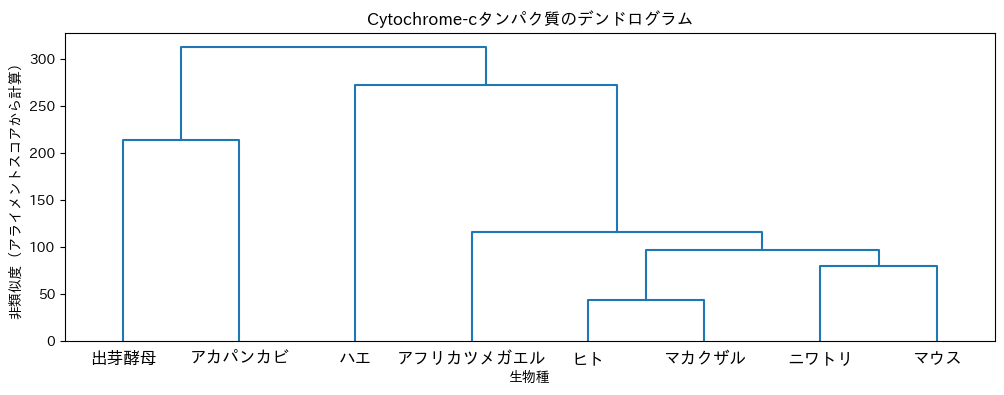

In [ ]:
# 日本語表示用
!pip install japanize-matplotlib
import japanize_matplotlib

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# 非類似度行列Dの計算
D = S.max() - S

# ヒント：非類似度行列Dを用いてlinkage()を行う方法
Z = linkage(squareform(D, checks=False), method='average')

# dendrogram()でデンドログラムを図示
# labels: 葉ノードの下に表示されるラベル
# color_threshold: 0にすると全ての枝が同じ色で表示される
# color_thresholdを指定しないと近い枝ごとに色分けされる
plt.figure(figsize=(12, 4))
dendrogram(Z, labels=species,  color_threshold=0)
plt.title('Cytochrome-cタンパク質のデンドログラム')
plt.xlabel('生物種')
plt.ylabel('非類似度（アライメントスコアから計算）')